In [1]:
import matplotlib.pyplot as plt
import cv2

In [4]:
im = cv2.imread('elephant.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


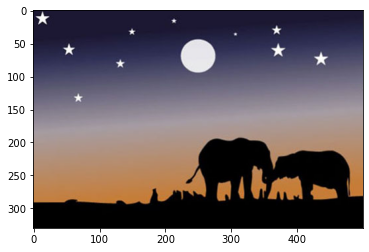

In [5]:
plt.imshow(im)
plt.show()

In [6]:
all_pixels = im.reshape((-1, 3))
print(all_pixels.shape)

(165000, 3)


In [7]:
from sklearn.cluster import KMeans

In [8]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [9]:
centers = km.cluster_centers_

In [11]:
import numpy as np
centers = np.array(centers, dtype="uint8")

In [12]:
print(centers)

[[ 38  35  64]
 [174 145 128]
 [ 99  95 118]
 [  1   0   1]]


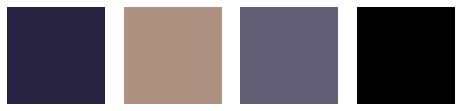

In [13]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

## Image segmentation

In [14]:
new_img = np.zeros((330*500,3),dtype='uint8')

print(new_img.shape)

(165000, 3)


In [15]:
colors

[array([38, 35, 64], dtype=uint8),
 array([174, 145, 128], dtype=uint8),
 array([ 99,  95, 118], dtype=uint8),
 array([1, 0, 1], dtype=uint8)]

In [16]:
km.labels_

array([0, 0, 0, ..., 3, 3, 3])

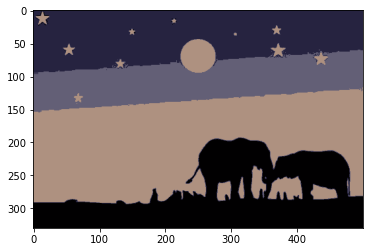

In [17]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()